In [1]:
#Importing all the required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('data/complete_dataset.csv')

In [3]:
df.head(10)

Unnamed: 0  Borough      Neighborhoods   Latitude  Longitude  Population  \
0           0  Central    Cantonment area  12.972442  77.580643      866377   
1           1  Central             Domlur  12.960992  77.638726      743186   
2           2  Central        Indiranagar  12.971891  77.641151      474289   
3           3  Central  Jeevanbheemanagar  12.962900  77.659500      527874   
4           4  Central        Malleswaram  13.003100  77.564300      893629   
5           5  Central          Pete area  12.962700  77.575800      730999   
6           6  Central        Rajajinagar  12.990100  77.552500      981362   
7           7  Central     Sadashivanagar  13.006800  77.581300      662625   
8           8  Central      Seshadripuram  12.993500  77.578700      396862   
9           9  Central       Shivajinagar  12.985700  77.605700       77836   

        City  AverageIncome  
0  Bangalore   18944.099792  
1  Bangalore   56837.022198  
2  Bangalore   41991.817435  
3  Bangalore    6667.447632  
4  Bangalore   53270.063892  
5  Bangalore   50712.430215  
6  Bangalore   60967.535874  
7  Bangalore   59943.541564  
8  Bangalore   58407.090338  
9  Bangalore   55850.962099

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

Creating 'Population' and 'Income' dataframe from the main dataframe

In [5]:
bangalore_population = pd.DataFrame(df[['Borough','Neighborhoods','Population']])

In [6]:
bangalore_population.head()

Borough      Neighborhoods  Population
0  Central    Cantonment area      866377
1  Central             Domlur      743186
2  Central        Indiranagar      474289
3  Central  Jeevanbheemanagar      527874
4  Central        Malleswaram      893629

In [7]:
bangalore_population.to_csv('data/population_dataset.csv')

In [8]:
bangalore_income = pd.DataFrame(df[['Borough','Neighborhoods','AverageIncome']])

In [9]:
bangalore_income.head()

Borough      Neighborhoods  AverageIncome
0  Central    Cantonment area   18944.099792
1  Central             Domlur   56837.022198
2  Central        Indiranagar   41991.817435
3  Central  Jeevanbheemanagar    6667.447632
4  Central        Malleswaram   53270.063892

In [10]:
bangalore_income.to_csv('data/income_dataset.csv')

In [11]:
bangalore_latitude = df['Latitude'].mean()
bangalore_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Bangalore are : ",bangalore_latitude,bangalore_longitude)

Latitude and Longitude of Bangalore are :  12.9623396203125 77.601752946875


In [12]:
CLIENT_ID = 'ZK40VO3EPO1ZY5C04PNYSMQH2ZFZ3U1TPL0QME3WEY553DMH'
CLIENT_SECRET = 'RQBRNE2T3OTMYY4BBJ3YWLS0P2FK413O22MQV1QHBHAD04WG'
VERSION = '20180606'
LIMIT = 150

In [13]:
unique_boroughs_of_bangalore = df['Borough'].unique().tolist()

In [14]:
unique_boroughs_of_bangalore

['Central',
 'Eastern',
 'NorthEastern',
 'Northern',
 'SouthEastern',
 'Southern',
 'SouthernSuburbs',
 'Western']

In [15]:
borough_colors ={}
for i in unique_boroughs_of_bangalore:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [16]:
borough_colors

{'Central': '#1E8D7D',
 'Eastern': '#78A0BE',
 'NorthEastern': '#781616',
 'Northern': '#C5EF24',
 'SouthEastern': '#E5288B',
 'Southern': '#67C929',
 'SouthernSuburbs': '#D94951',
 'Western': '#FC21B9'}

In [17]:
bangalore_map = folium.Map(location=[bangalore_latitude,bangalore_longitude],zoom_start=12,control_scale=True)

In [18]:
for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(bangalore_map)

In [19]:
bangalore_map

# Exploring bangalore Neighborhoods using FourSquare API

In [20]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [21]:
bangalore_venues = getNearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

Fetching venues for :  Cantonment area
Fetching venues for :  Domlur
Fetching venues for :  Indiranagar
Fetching venues for :  Jeevanbheemanagar
Fetching venues for :  Malleswaram
Fetching venues for :  Pete area
Fetching venues for :  Rajajinagar
Fetching venues for :  Sadashivanagar
Fetching venues for :  Seshadripuram
Fetching venues for :  Shivajinagar
Fetching venues for :  Ulsoor
Fetching venues for :  Vasanth Nagar
Fetching venues for :  Bellandur
Fetching venues for :  CV Raman Nagar
Fetching venues for :  Hoodi
Fetching venues for :  Krishnarajapuram
Fetching venues for :  Mahadevapura
Fetching venues for :  Marathahalli
Fetching venues for :  Varthur
Fetching venues for :  Whitefield
Fetching venues for :  Banaswadi
Fetching venues for :  HBR Layout
Fetching venues for :  Horamavu
Fetching venues for :  Kammanahalli
Fetching venues for :  Lingarajapuram
Fetching venues for :  Ramamurthy Nagar
Fetching venues for :  Hebbal
Fetching venues for :  Jalahalli
Fetching venues for :

In [22]:
print("Total number of venues found in Bangalore are : ",bangalore_venues.shape[0])

Total number of venues found in Bangalore are :  604


In [23]:
bangalore_venues.head(5)

Neighborhood  Borough  Neighborhood Latitude  Neighborhood Longitude  \
0  Cantonment area  Central              12.972442               77.580643   
1  Cantonment area  Central              12.972442               77.580643   
2  Cantonment area  Central              12.972442               77.580643   
3  Cantonment area  Central              12.972442               77.580643   
4  Cantonment area  Central              12.972442               77.580643   

                Venue  Venue Latitude  Venue Longitude      Venue Category  
0      Hotel Fishland       12.975569        77.578592  Seafood Restaurant  
1        Adigas Hotel       12.973554        77.579161          Restaurant  
2    Sapna Book House       12.976355        77.578461           Bookstore  
3      Vasudev Adigas       12.973707        77.579257   Indian Restaurant  
4  Sree Vishnu Bhavan       12.973950        77.579038   Indian Restaurant

In [24]:
bangalore_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Indian Restaurant       112
Fast Food Restaurant     32
Café                     29
Bakery                   25
Ice Cream Shop           24
Department Store         20
Pizza Place              18
Coffee Shop              17
Chinese Restaurant       15
Restaurant               11
Name: Neighborhood, dtype: int64

In [25]:
print("Total number of unique categories in bangalore are : ",len(bangalore_venues['Venue Category'].unique()))

Total number of unique categories in bangalore are :  131


### Getting number of venues per neighborhood

In [26]:
individual_bangalore_venue_count = bangalore_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()

In [27]:
individual_bangalore_venue_count

Borough
Borough Neighborhood                 
Central Cantonment area             6
        Domlur                     11
        Indiranagar                64
        Jeevanbheemanagar           4
        Malleswaram                 8
...                               ...
Western Nagarbhavi                  6
        Nandini Layout              1
        Nayandahalli                3
        Rajarajeshwari Nagar        6
        Vijayanagar                 4

[62 rows x 1 columns]

In [28]:
individual_bangalore_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)

In [29]:
individual_bangalore_venue_count.reset_index(inplace=True)

In [30]:
individual_bangalore_venue_count

Borough          Neighborhood  NumberOfVenues
0   Central       Cantonment area               6
1   Central                Domlur              11
2   Central           Indiranagar              64
3   Central     Jeevanbheemanagar               4
4   Central           Malleswaram               8
..      ...                   ...             ...
57  Western            Nagarbhavi               6
58  Western        Nandini Layout               1
59  Western          Nayandahalli               3
60  Western  Rajarajeshwari Nagar               6
61  Western           Vijayanagar               4

[62 rows x 3 columns]

[Text(0, 0, 'Cantonment area'),
 Text(1, 0, 'Domlur'),
 Text(2, 0, 'Indiranagar'),
 Text(3, 0, 'Jeevanbheemanagar'),
 Text(4, 0, 'Malleswaram'),
 Text(5, 0, 'Pete area'),
 Text(6, 0, 'Rajajinagar'),
 Text(7, 0, 'Sadashivanagar'),
 Text(8, 0, 'Seshadripuram'),
 Text(9, 0, 'Shivajinagar'),
 Text(10, 0, 'Ulsoor'),
 Text(11, 0, 'Vasanth Nagar'),
 Text(12, 0, 'Bellandur'),
 Text(13, 0, 'CV Raman Nagar'),
 Text(14, 0, 'Hoodi'),
 Text(15, 0, 'Krishnarajapuram'),
 Text(16, 0, 'Mahadevapura'),
 Text(17, 0, 'Marathahalli'),
 Text(18, 0, 'Varthur'),
 Text(19, 0, 'Whitefield'),
 Text(20, 0, 'Banaswadi'),
 Text(21, 0, 'HBR Layout'),
 Text(22, 0, 'Horamavu'),
 Text(23, 0, 'Kammanahalli'),
 Text(24, 0, 'Lingarajapuram'),
 Text(25, 0, 'Ramamurthy Nagar'),
 Text(26, 0, 'Hebbal'),
 Text(27, 0, 'Jalahalli'),
 Text(28, 0, 'Mathikere'),
 Text(29, 0, 'R. T. Nagar'),
 Text(30, 0, 'Vidyaranyapura'),
 Text(31, 0, 'Yelahanka'),
 Text(32, 0, 'Yeshwanthpur'),
 Text(33, 0, 'BTM Layout'),
 Text(34, 0, 'Bommanahalli

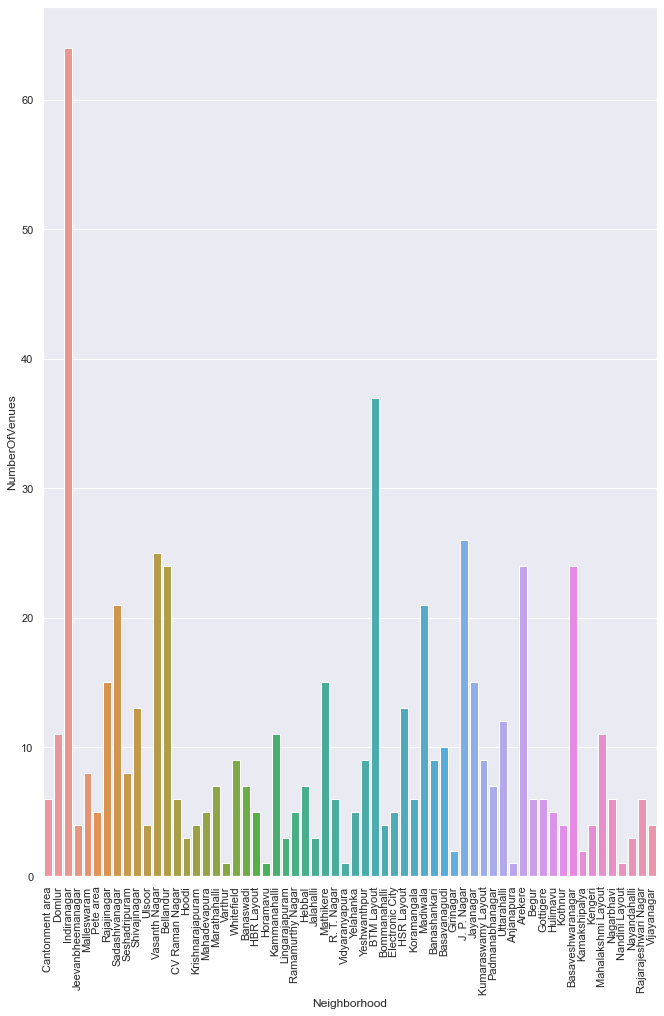

In [31]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_bangalore_venue_count)
plot.set_xticklabels(individual_bangalore_venue_count['Neighborhood'],rotation=90)

From the above graph we can see that inderanagar has most number of venues and soo on...

## Exploring Whitefield venues

In [32]:
bangalore_venues[bangalore_venues['Neighborhood']=='Whitefield']

Neighborhood  Borough  Neighborhood Latitude  Neighborhood Longitude  \
234   Whitefield  Eastern                12.9698                 77.7499   
235   Whitefield  Eastern                12.9698                 77.7499   
236   Whitefield  Eastern                12.9698                 77.7499   
237   Whitefield  Eastern                12.9698                 77.7499   
238   Whitefield  Eastern                12.9698                 77.7499   
239   Whitefield  Eastern                12.9698                 77.7499   
240   Whitefield  Eastern                12.9698                 77.7499   
241   Whitefield  Eastern                12.9698                 77.7499   
242   Whitefield  Eastern                12.9698                 77.7499   

                                     Venue  Venue Latitude  Venue Longitude  \
234                       Herbs and Spices       12.968145        77.750862   
235                              Golds Gym       12.972217        77.750529   
236                           Chef Baker's       12.969730        77.751302   
237                    Royal Orchid Suites       12.966774        77.751262   
238         The river side bar and kitchen       12.967298        77.749614   
239                         Reliance Fresh       12.970894        77.750045   
240  Cult - The Workout Station Whitefield       12.968434        77.749597   
241                             Cheenavala       12.966435        77.749368   
242                                refresh       12.965621        77.749234   

                  Venue Category  
234  Eastern European Restaurant  
235         Gym / Fitness Center  
236                       Bakery  
237                        Hotel  
238                    Hotel Bar  
239             Department Store  
240         Gym / Fitness Center  
241            Kerala Restaurant  
242                         Café

# One hot encoding for letting us to compare different venues based on some common scale


In [33]:
bangalore_venues_onehot = pd.get_dummies(bangalore_venues[['Venue Category']])

In [34]:
bangalore_venues_onehot

Venue Category_ATM  Venue Category_Andhra Restaurant  \
0                     0                                 0   
1                     0                                 0   
2                     0                                 0   
3                     0                                 0   
4                     0                                 0   
..                  ...                               ...   
599                   0                                 0   
600                   0                                 0   
601                   0                                 0   
602                   0                                 0   
603                   0                                 0   

     Venue Category_Art Museum  Venue Category_Arts & Crafts Store  \
0                            0                                   0   
1                            0                                   0   
2                            0                                   0   
3                            0                                   0   
4                            0                                   0   
..                         ...                                 ...   
599                          0                                   0   
600                          0                                   0   
601                          0                                   0   
602                          0                                   0   
603                          0                                   0   

     Venue Category_Asian Restaurant  Venue Category_Athletics & Sports  \
0                                  0                                  0   
1                                  0                                  0   
2                                  0                                  0   
3                                  0                                  0   
4                                  0                                  0   
..                               ...                                ...   
599                                0                                  0   
600                                0                                  0   
601                                0                                  0   
602                                0                                  0   
603                                0                                  0   

     Venue Category_Auto Garage  Venue Category_BBQ Joint  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   
..                          ...                       ...   
599                           0                         0   
600                           0                         0   
601                           0                         0   
602                           0                         0   
603                           0                         0   

     Venue Category_Badminton Court  Venue Category_Bakery  ...  \
0                                 0                      0  ...   
1                                 0                      0  ...   
2                                 0                      0  ...   
3                                 0                      0  ...   
4                                 0                      0  ...   
..                              ...                    ...  ...   
599                               0                      0  ...   
600                               0                      0  ...   
601                               0                      0  ...   
602                               0                      0  ...   
603                               0                      1  

In [35]:
bangalore_venues_onehot['Neighborhood'] = bangalore_venues['Neighborhood']
bangalore_venues_grouped = bangalore_venues_onehot.groupby('Neighborhood').mean().reset_index()
bangalore_venues_grouped

Neighborhood  Venue Category_ATM  Venue Category_Andhra Restaurant  \
0       Anjanapura                 1.0                               0.0   
1          Arekere                 0.0                               0.0   
2       BTM Layout                 0.0                               0.0   
3     Banashankari                 0.0                               0.0   
4        Banaswadi                 0.0                               0.0   
..             ...                 ...                               ...   
57  Vidyaranyapura                 0.0                               0.0   
58     Vijayanagar                 0.0                               0.0   
59      Whitefield                 0.0                               0.0   
60       Yelahanka                 0.2                               0.0   
61    Yeshwanthpur                 0.0                               0.0   

    Venue Category_Art Museum  Venue Category_Arts & Crafts Store  \
0                         0.0                                 0.0   
1                         0.0                                 0.0   
2                         0.0                                 0.0   
3                         0.0                                 0.0   
4                         0.0                                 0.0   
..                        ...                                 ...   
57                        0.0                                 0.0   
58                        0.0                                 0.0   
59                        0.0                                 0.0   
60                        0.0                                 0.0   
61                        0.0                                 0.0   

    Venue Category_Asian Restaurant  Venue Category_Athletics & Sports  \
0                               0.0                           0.000000   
1                               0.0                           0.041667   
2                               0.0                           0.000000   
3                               0.0                           0.000000   
4                               0.0                           0.000000   
..                              ...                                ...   
57                              0.0                           0.000000   
58                              0.0                           0.000000   
59                              0.0                           0.000000   
60                              0.0                           0.000000   
61                              0.0                           0.000000   

    Venue Category_Auto Garage  Venue Category_BBQ Joint  \
0                          0.0                       0.0   
1                          0.0                       0.0   
2                          0.0                       0.0   
3                          0.0                       0.0   
4                          0.0                       0.0   
..                         ...                       ...   
57                         0.0                       0.0   
58                         0.0                       0.0   
59                         0.0                       0.0   
60                         0.0                       0.0   
61                         0.0                       0.0   

    Venue Category_Badminton Court  ...  Venue Category_Tea Room  \
0                              0.0  ...                      0.0   
1                              0.0  ...                      0.0   
2                              0.0  ...                      0.0   
3                              0.0  ...                      0.0   
4                              0.0  ...                      0.0   
..                             ...  ...                      ...   
57                             0.0  ...                      0.0   
58                             0.0  ...                      0.0   
59                             0.0  ...   

In [36]:
number_of_top_venues = 5

In [37]:
for hood in bangalore_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = bangalore_venues_grouped[bangalore_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Anjanapura ---------
                                          Venue  Frequency
0                            Venue Category_ATM        1.0
1                    Venue Category_Pizza Place        0.0
2          Venue Category_Performing Arts Venue        0.0
3                           Venue Category_Park        0.0
4  Venue Category_Paper / Office Supplies Store        0.0


--------- Arekere ---------
                                Venue  Frequency
0    Venue Category_Indian Restaurant       0.21
1  Venue Category_Sporting Goods Shop       0.17
2          Venue Category_Pizza Place       0.08
3             Venue Category_Bus Line       0.04
4     Venue Category_Department Store       0.04


--------- BTM Layout ---------
                               Venue  Frequency
0   Venue Category_Indian Restaurant       0.19
1         Venue Category_Snack Place       0.08
2      Venue Category_Ice Cream Shop       0.08
3              Venue Category_Bakery       0.08
4  Venue Category_

4        Venue Category_Yoga Studio       0.05


--------- Seshadripuram ---------
                              Venue  Frequency
0              Venue Category_Hotel       0.12
1             Venue Category_Lounge       0.12
2  Venue Category_Indian Restaurant       0.12
3   Venue Category_Asian Restaurant       0.12
4        Venue Category_Chaat Place       0.12


--------- Shivajinagar ---------
                                    Venue  Frequency
0        Venue Category_Indian Restaurant       0.38
1           Venue Category_Clothing Store       0.15
2               Venue Category_Donut Shop       0.08
3     Venue Category_Fast Food Restaurant       0.08
4  Venue Category_South Indian Restaurant       0.08


--------- Ulsoor ---------
                               Venue  Frequency
0                Venue Category_Café       0.50
1              Venue Category_Bakery       0.25
2        Venue Category_Burger Joint       0.25
3       Venue Category_Movie Theater       0.00
4  Venue Cate

Frequency of each neighborhood and its top 5 venues can be known. This is very important is we can analyze top neighborhoods with most busy restaurants

In [38]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [39]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bangalore_venues_grouped['Neighborhood']

for ind in np.arange(bangalore_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangalore_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood             1st Most Common Venue  \
0    Anjanapura                Venue Category_ATM   
1       Arekere  Venue Category_Indian Restaurant   
2    BTM Layout  Venue Category_Indian Restaurant   
3  Banashankari               Venue Category_Café   
4     Banaswadi  Venue Category_Indian Restaurant   

                2nd Most Common Venue          3rd Most Common Venue  \
0        Venue Category_Deli / Bodega    Venue Category_Dessert Shop   
1  Venue Category_Sporting Goods Shop     Venue Category_Pizza Place   
2          Venue Category_Snack Place  Venue Category_Ice Cream Shop   
3       Venue Category_Clothing Store     Venue Category_Men's Store   
4               Venue Category_Market          Venue Category_Bakery   

                          4th Most Common Venue  \
0             Venue Category_Dim Sum Restaurant   
1                 Venue Category_Breakfast Spot   
2             Venue Category_Chinese Restaurant   
3                     Venue Category_Shoe Store   
4  Venue Category_Vegetarian / Vegan Restaurant   

              5th Most Common Venue       6th Most Common Venue  \
0              Venue Category_Diner   Venue Category_Donut Shop   
1        Venue Category_Supermarket     Venue Category_Bus Line   
2             Venue Category_Bakery  Venue Category_Coffee Shop   
3  Venue Category_Indian Restaurant  Venue Category_Pizza Place   
4               Venue Category_Café   Venue Category_Food Court   

                          7th Most Common Venue  \
0    Venue Category_Eastern European Restaurant   
1                   Venue Category_Liquor Store   
2  Venue Category_Vegetarian / Vegan Restaurant   
3           Venue Category_Fast Food Restaurant   
4              Venue Category_Food & Drink Shop   

               8th Most Common Venue                9th Most Common Venue  \
0   Venue Category_Electronics Store    Venue Category_Falafel Restaurant   
1  Venue Category_Chinese Restaurant  Venue Category_Fast Food Restaurant   
2         Venue Category_Pizza Place  Venue Category_Fast Food Restaurant   
3         Venue Category_Flower Shop           Venue Category_Flea Market   
4         Venue Category_Flower Shop           Venue Category_Flea Market   

                10th Most Common Venue  
0  Venue Category_Fast Food Restaurant  
1    Venue Category_Mughlai Restaurant  
2        Venue Category_Sandwich Place  
3     Venue Category_Fish & Chips Shop  
4     Venue Category_Fish & Chips Shop

In [40]:
neighborhoods_venues_sorted.shape

(62, 11)

## Next challenge is to find the optimal k value for clustering and we do it using the elbow method

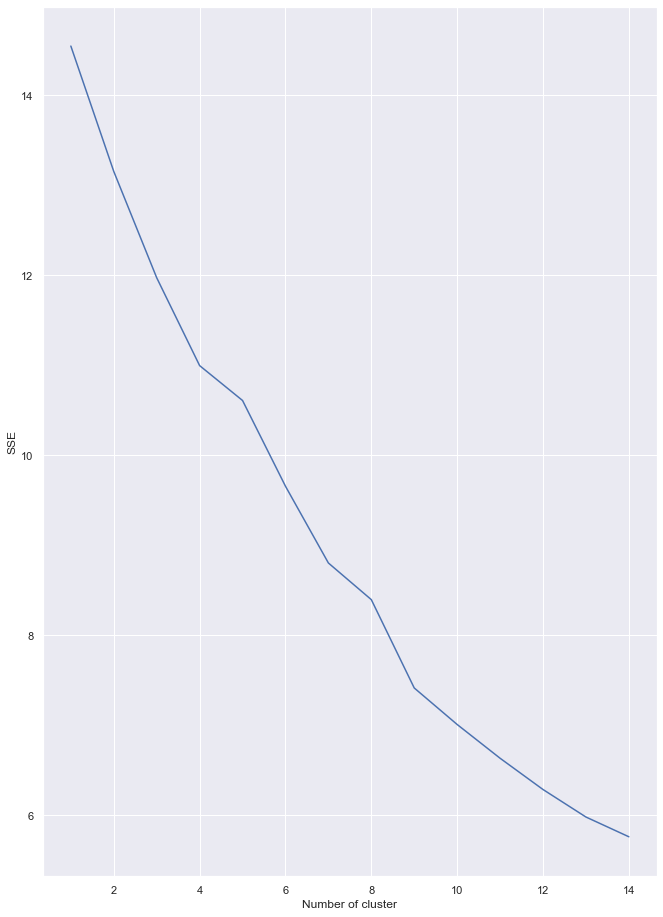

In [41]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))
    bangalore_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### From the above graph, we can see the optimal value for cluster is 5.

In [42]:
kmeans = KMeans(n_clusters=5,random_state=0)

In [43]:
kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))

KMeans(n_clusters=5, random_state=0)

In [44]:
bangalore_venues_grouped['Cluster'] = kmeans.labels_

In [45]:
bangalore_venues_grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0    23
1     4
2    18
3     4
4    13
Name: Neighborhood, dtype: int64

In [46]:
bangalore_venues_grouped.columns

Index(['Neighborhood', 'Venue Category_ATM',
       'Venue Category_Andhra Restaurant', 'Venue Category_Art Museum',
       'Venue Category_Arts & Crafts Store', 'Venue Category_Asian Restaurant',
       'Venue Category_Athletics & Sports', 'Venue Category_Auto Garage',
       'Venue Category_BBQ Joint', 'Venue Category_Badminton Court',
       ...
       'Venue Category_Tex-Mex Restaurant', 'Venue Category_Toll Plaza',
       'Venue Category_Train Station', 'Venue Category_Udupi Restaurant',
       'Venue Category_Vegetarian / Vegan Restaurant',
       'Venue Category_Vietnamese Restaurant', 'Venue Category_Wine Bar',
       'Venue Category_Women's Store', 'Venue Category_Yoga Studio',
       'Cluster'],
      dtype='object', length=133)

In [47]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues_grouped,on='Neighborhood')

In [48]:
neighborhoods_venues_sorted.head(4)

Neighborhood             1st Most Common Venue  \
0    Anjanapura                Venue Category_ATM   
1       Arekere  Venue Category_Indian Restaurant   
2    BTM Layout  Venue Category_Indian Restaurant   
3  Banashankari               Venue Category_Café   

                2nd Most Common Venue          3rd Most Common Venue  \
0        Venue Category_Deli / Bodega    Venue Category_Dessert Shop   
1  Venue Category_Sporting Goods Shop     Venue Category_Pizza Place   
2          Venue Category_Snack Place  Venue Category_Ice Cream Shop   
3       Venue Category_Clothing Store     Venue Category_Men's Store   

               4th Most Common Venue             5th Most Common Venue  \
0  Venue Category_Dim Sum Restaurant              Venue Category_Diner   
1      Venue Category_Breakfast Spot        Venue Category_Supermarket   
2  Venue Category_Chinese Restaurant             Venue Category_Bakery   
3          Venue Category_Shoe Store  Venue Category_Indian Restaurant   

        6th Most Common Venue                         7th Most Common Venue  \
0   Venue Category_Donut Shop    Venue Category_Eastern European Restaurant   
1     Venue Category_Bus Line                   Venue Category_Liquor Store   
2  Venue Category_Coffee Shop  Venue Category_Vegetarian / Vegan Restaurant   
3  Venue Category_Pizza Place           Venue Category_Fast Food Restaurant   

               8th Most Common Venue                9th Most Common Venue  \
0   Venue Category_Electronics Store    Venue Category_Falafel Restaurant   
1  Venue Category_Chinese Restaurant  Venue Category_Fast Food Restaurant   
2         Venue Category_Pizza Place  Venue Category_Fast Food Restaurant   
3         Venue Category_Flower Shop           Venue Category_Flea Market   

   ... Venue Category_Tex-Mex Restaurant  Venue Category_Toll Plaza  \
0  ...                               0.0                        0.0   
1  ...                               0.0                        0.0   
2  ...                               0.0                        0.0   
3  ...                               0.0                        0.0   

   Venue Category_Train Station  Venue Category_Udupi Restaurant  \
0                           0.0                              0.0   
1                           0.0                              0.0   
2                           0.0                              0.0   
3                           0.0                              0.0   

   Venue Category_Vegetarian / Vegan Restaurant  \
0                                      0.000000   
1                                      0.000000   
2                                      0.054054   
3                                      0.000000   

   Venue Category_Vietnamese Restaurant  Venue Category_Wine Bar  \
0                                   0.0                      0.0   
1                                   0.0                      0.0   
2                                   0.0                      0.0   
3                                   0.0                      0.0   

   Venue Category_Women's Store  Venue Category_Yoga Studio  Cluster  
0                           0.0                         0.0        4  
1                           0.0                         0.0        0  
2                           0.0                         0.0        0  
3                           0.0                         0.0        4  

[4 rows x 143 columns]

In [49]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues,on='Neighborhood')

In [50]:
# create map
map_clusters = folium.Map(location=[bangalore_latitude, bangalore_longitude], zoom_start=11)

In [51]:
# set color scheme for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       

In [52]:
map_clusters

## Finding similar locations based on user input (recommending location)
#### We need to analyze factors such as population and Income to recommend.

In [53]:
bangalore_income.head()

Borough      Neighborhoods  AverageIncome
0  Central    Cantonment area   18944.099792
1  Central             Domlur   56837.022198
2  Central        Indiranagar   41991.817435
3  Central  Jeevanbheemanagar    6667.447632
4  Central        Malleswaram   53270.063892

In [54]:
bangalore_population.head()

Borough      Neighborhoods  Population
0  Central    Cantonment area      866377
1  Central             Domlur      743186
2  Central        Indiranagar      474289
3  Central  Jeevanbheemanagar      527874
4  Central        Malleswaram      893629

In [55]:
bangalore_population['Normalized_population'] = bangalore_population['Population']/bangalore_population['Population'].max(axis=0)
bangalore_population.head()

Borough      Neighborhoods  Population  Normalized_population
0  Central    Cantonment area      866377               0.880810
1  Central             Domlur      743186               0.755567
2  Central        Indiranagar      474289               0.482190
3  Central  Jeevanbheemanagar      527874               0.536668
4  Central        Malleswaram      893629               0.908516

In [56]:
bangalore_income['Normalized_income'] = bangalore_income['AverageIncome']/bangalore_income['AverageIncome'].max(axis=0)
bangalore_income.head()

Borough      Neighborhoods  AverageIncome  Normalized_income
0  Central    Cantonment area   18944.099792           0.293051
1  Central             Domlur   56837.022198           0.879225
2  Central        Indiranagar   41991.817435           0.649581
3  Central  Jeevanbheemanagar    6667.447632           0.103140
4  Central        Malleswaram   53270.063892           0.824047

In [57]:
bangalore_venues_grouped.head(1)

Neighborhood  Venue Category_ATM  Venue Category_Andhra Restaurant  \
0   Anjanapura                 1.0                               0.0   

   Venue Category_Art Museum  Venue Category_Arts & Crafts Store  \
0                        0.0                                 0.0   

   Venue Category_Asian Restaurant  Venue Category_Athletics & Sports  \
0                              0.0                                0.0   

   Venue Category_Auto Garage  Venue Category_BBQ Joint  \
0                         0.0                       0.0   

   Venue Category_Badminton Court  ...  Venue Category_Tex-Mex Restaurant  \
0                             0.0  ...                                0.0   

   Venue Category_Toll Plaza  Venue Category_Train Station  \
0                        0.0                           0.0   

   Venue Category_Udupi Restaurant  \
0                              0.0   

   Venue Category_Vegetarian / Vegan Restaurant  \
0                                           0.0   

   Venue Category_Vietnamese Restaurant  Venue Category_Wine Bar  \
0                                   0.0                      0.0   

   Venue Category_Women's Store  Venue Category_Yoga Studio  Cluster  
0                           0.0                         0.0        4  

[1 rows x 133 columns]

#### recommending Veg restaurants

In [58]:
bangalore_veg = bangalore_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
bangalore_veg.head()

Neighborhood  Venue Category_ATM  Venue Category_Andhra Restaurant  \
0    Anjanapura                   1                                 0   
1       Arekere                   0                                 0   
2    BTM Layout                   0                                 0   
3  Banashankari                   0                                 0   
4     Banaswadi                   0                                 0   

   Venue Category_Art Museum  Venue Category_Arts & Crafts Store  \
0                          0                                   0   
1                          0                                   0   
2                          0                                   0   
3                          0                                   0   
4                          0                                   0   

   Venue Category_Asian Restaurant  Venue Category_Athletics & Sports  \
0                                0                                  0   
1                                0                                  1   
2                                0                                  0   
3                                0                                  0   
4                                0                                  0   

   Venue Category_Auto Garage  Venue Category_BBQ Joint  \
0                           0                         0   
1                           0                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   

   Venue Category_Badminton Court  ...  Venue Category_Tea Room  \
0                               0  ...                        0   
1                               0  ...                        0   
2                               0  ...                        0   
3                               0  ...                        0   
4                               0  ...                        0   

   Venue Category_Tex-Mex Restaurant  Venue Category_Toll Plaza  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   

   Venue Category_Train Station  Venue Category_Udupi Restaurant  \
0                             0                                0   
1                             0                                0   
2                             0                                0   
3                             0                                0   
4                             0                                0   

   Venue Category_Vegetarian / Vegan Restaurant  \
0                                             0   
1                                             0   
2                                             2   
3                                             0   
4                                             1   

   Venue Category_Vietnamese Restaurant  Venue Category_Wine Bar  \
0                                     0                        0   
1                                     0                        0   
2                                     0                        0   
3                                     0                        0   
4                                     0                        0   

   Venue Category_Women's Store  Venue Category_Yoga Studio  
0                             0                           0  
1                             0                           0  
2                             0                           0  
3                             0                           0  
4                             0                           0  

[5 rows x 132 columns]

In [59]:
bangalore_veg['Venue Category_Vegetarian / Vegan Restaurant']

0     0
1     0
2     2
3     0
4     1
     ..
57    0
58    0
59    0
60    0
61    0
Name: Venue Category_Vegetarian / Vegan Restaurant, Length: 62, dtype: uint8

In [60]:
bangalore_veg = bangalore_veg[['Neighborhood','Venue Category_Vegetarian / Vegan Restaurant']]

In [61]:
bangalore_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)

In [62]:
bangalore_veg.head()

Neighborhood  NumberOfVegRestaurants
0    Anjanapura                       0
1       Arekere                       0
2    BTM Layout                       2
3  Banashankari                       0
4     Banaswadi                       1

In [63]:
bangalore_veg['NumberOfNonVeganrestaurants'] = 1-(bangalore_veg['NumberOfVegRestaurants']/bangalore_veg['NumberOfVegRestaurants'].max(axis=0))

In [64]:
bangalore_veg.head(10)

Neighborhood  NumberOfVegRestaurants  NumberOfNonVeganrestaurants
0         Anjanapura                       0                          1.0
1            Arekere                       0                          1.0
2         BTM Layout                       2                          0.0
3       Banashankari                       0                          1.0
4          Banaswadi                       1                          0.5
5       Basavanagudi                       0                          1.0
6  Basaveshwaranagar                       0                          1.0
7              Begur                       0                          1.0
8          Bellandur                       0                          1.0
9       Bommanahalli                       0                          1.0

In [65]:
bangalore_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

### Building a target neighborhood by providing a sample restaurant : say ' Whitefield '

In [66]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Whitefield']

In [67]:
target_cluster_dataframe.reset_index()

index Neighborhood                1st Most Common Venue  \
0    581   Whitefield  Venue Category_Gym / Fitness Center   
1    582   Whitefield  Venue Category_Gym / Fitness Center   
2    583   Whitefield  Venue Category_Gym / Fitness Center   
3    584   Whitefield  Venue Category_Gym / Fitness Center   
4    585   Whitefield  Venue Category_Gym / Fitness Center   
5    586   Whitefield  Venue Category_Gym / Fitness Center   
6    587   Whitefield  Venue Category_Gym / Fitness Center   
7    588   Whitefield  Venue Category_Gym / Fitness Center   
8    589   Whitefield  Venue Category_Gym / Fitness Center   

   2nd Most Common Venue     3rd Most Common Venue 4th Most Common Venue  \
0  Venue Category_Bakery  Venue Category_Hotel Bar  Venue Category_Hotel   
1  Venue Category_Bakery  Venue Category_Hotel Bar  Venue Category_Hotel   
2  Venue Category_Bakery  Venue Category_Hotel Bar  Venue Category_Hotel   
3  Venue Category_Bakery  Venue Category_Hotel Bar  Venue Category_Hotel   
4  Venue Category_Bakery  Venue Category_Hotel Bar  Venue Category_Hotel   
5  Venue Category_Bakery  Venue Category_Hotel Bar  Venue Category_Hotel   
6  Venue Category_Bakery  Venue Category_Hotel Bar  Venue Category_Hotel   
7  Venue Category_Bakery  Venue Category_Hotel Bar  Venue Category_Hotel   
8  Venue Category_Bakery  Venue Category_Hotel Bar  Venue Category_Hotel   

             5th Most Common Venue  \
0  Venue Category_Department Store   
1  Venue Category_Department Store   
2  Venue Category_Department Store   
3  Venue Category_Department Store   
4  Venue Category_Department Store   
5  Venue Category_Department Store   
6  Venue Category_Department Store   
7  Venue Category_Department Store   
8  Venue Category_Department Store   

                        6th Most Common Venue  \
0  Venue Category_Eastern European Restaurant   
1  Venue Category_Eastern European Restaurant   
2  Venue Category_Eastern European Restaurant   
3  Venue Category_Eastern European Restaurant   
4  Venue Category_Eastern European Restaurant   
5  Venue Category_Eastern European Restaurant   
6  Venue Category_Eastern European Restaurant   
7  Venue Category_Eastern European Restaurant   
8  Venue Category_Eastern European Restaurant   

              7th Most Common Venue 8th Most Common Venue  ...  \
0  Venue Category_Kerala Restaurant   Venue Category_Café  ...   
1  Venue Category_Kerala Restaurant   Venue Category_Café  ...   
2  Venue Category_Kerala Restaurant   Venue Category_Café  ...   
3  Venue Category_Kerala Restaurant   Venue Category_Café  ...   
4  Venue Category_Kerala Restaurant   Venue Category_Café  ...   
5  Venue Category_Kerala Restaurant   Venue Category_Café  ...   
6  Venue Category_Kerala Restaurant   Venue Category_Café  ...   
7  Venue Category_Kerala Restaurant   Venue Category_Café  ...   
8  Venue Category_Kerala Restaurant   Venue Category_Café  ...   

  Venue Category_Women's Store Venue Category_Yoga Studio  Cluster  Borough  \
0                          0.0                        0.0        2  Eastern   
1                          0.0                        0.0        2  Eastern   
2                          0.0                        0.0        2  Eastern   
3                          0.0                        0.0        2  Eastern   
4                          0.0                        0.0        2  Eastern   
5                          0.0                        0.0        2  Eastern   
6                          0.0                        0.0        2  Eastern   
7                          0.0                        0.0        2  Eastern   
8                          0.0                        0.0        2  Eastern   

   Neighborhood Latitude  Neighborhood Longitude  \
0                12.9698                 77.7499   
1                12.9698                 77.7499   
2                12.9698                 77.7499   
3                12.9698                 77.7499   
4                12.9698             

In [68]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']

In [69]:
target_cluster

2

In [70]:
print("The target cluster is : ",target_cluster)

The target cluster is :  2


In [71]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

Neighborhood                1st Most Common Venue  \
88  Basaveshwaranagar  Venue Category_Fast Food Restaurant   
89  Basaveshwaranagar  Venue Category_Fast Food Restaurant   
90  Basaveshwaranagar  Venue Category_Fast Food Restaurant   
91  Basaveshwaranagar  Venue Category_Fast Food Restaurant   
92  Basaveshwaranagar  Venue Category_Fast Food Restaurant   

            2nd Most Common Venue             3rd Most Common Venue  \
88  Venue Category_Ice Cream Shop  Venue Category_Indian Restaurant   
89  Venue Category_Ice Cream Shop  Venue Category_Indian Restaurant   
90  Venue Category_Ice Cream Shop  Venue Category_Indian Restaurant   
91  Venue Category_Ice Cream Shop  Venue Category_Indian Restaurant   
92  Venue Category_Ice Cream Shop  Venue Category_Indian Restaurant   

   4th Most Common Venue     5th Most Common Venue  \
88   Venue Category_Park  Venue Category_Juice Bar   
89   Venue Category_Park  Venue Category_Juice Bar   
90   Venue Category_Park  Venue Category_Juice Bar   
91   Venue Category_Park  Venue Category_Juice Bar   
92   Venue Category_Park  Venue Category_Juice Bar   

            6th Most Common Venue        7th Most Common Venue  \
88  Venue Category_Sandwich Place  Venue Category_Burger Joint   
89  Venue Category_Sandwich Place  Venue Category_Burger Joint   
90  Venue Category_Sandwich Place  Venue Category_Burger Joint   
91  Venue Category_Sandwich Place  Venue Category_Burger Joint   
92  Venue Category_Sandwich Place  Venue Category_Burger Joint   

        8th Most Common Venue       9th Most Common Venue  ...  \
88  Venue Category_Food Truck  Venue Category_Snack Place  ...   
89  Venue Category_Food Truck  Venue Category_Snack Place  ...   
90  Venue Category_Food Truck  Venue Category_Snack Place  ...   
91  Venue Category_Food Truck  Venue Category_Snack Place  ...   
92  Venue Category_Food Truck  Venue Category_Snack Place  ...   

   Venue Category_Women's Store  Venue Category_Yoga Studio  Cluster  Borough  \
88                          0.0                         0.0        2  Western   
89                          0.0                         0.0        2  Western   
90                          0.0                         0.0        2  Western   
91                          0.0                         0.0        2  Western   
92                          0.0                         0.0        2  Western   

    Neighborhood Latitude  Neighborhood Longitude                Venue  \
88                12.9886                 77.5383  Priyadarshini Grand   
89                12.9886                 77.5383           Polar Bear   
90                12.9886                 77.5383           Gold's gym   
91                12.9886                 77.5383       Bansuri Sweets   
92                12.9886                 77.5383       Baskin-Robbins   

    Venue Latitude  Venue Longitude        Venue Category  
88       12.990235        77.538020  Fast Food Restaurant  
89       12.991461        77.538832        Ice Cream Shop  
90       12.991855        77.538492                   Gym  
91       12.986912        77.539698     Indian Restaurant  
92       12.991218        77.538903        Ice Cream Shop  

[5 rows x 150 columns]

In [72]:
print("There are {} neighborhoods which has similar characteristics to Whitefield.".format(possible_neighborhoods.shape[0]))

There are 247 neighborhoods which has similar characteristics to Whitefield.


In [73]:
possible_neighborhoods.reset_index().head()

index       Neighborhood                1st Most Common Venue  \
0     88  Basaveshwaranagar  Venue Category_Fast Food Restaurant   
1     89  Basaveshwaranagar  Venue Category_Fast Food Restaurant   
2     90  Basaveshwaranagar  Venue Category_Fast Food Restaurant   
3     91  Basaveshwaranagar  Venue Category_Fast Food Restaurant   
4     92  Basaveshwaranagar  Venue Category_Fast Food Restaurant   

           2nd Most Common Venue             3rd Most Common Venue  \
0  Venue Category_Ice Cream Shop  Venue Category_Indian Restaurant   
1  Venue Category_Ice Cream Shop  Venue Category_Indian Restaurant   
2  Venue Category_Ice Cream Shop  Venue Category_Indian Restaurant   
3  Venue Category_Ice Cream Shop  Venue Category_Indian Restaurant   
4  Venue Category_Ice Cream Shop  Venue Category_Indian Restaurant   

  4th Most Common Venue     5th Most Common Venue  \
0   Venue Category_Park  Venue Category_Juice Bar   
1   Venue Category_Park  Venue Category_Juice Bar   
2   Venue Category_Park  Venue Category_Juice Bar   
3   Venue Category_Park  Venue Category_Juice Bar   
4   Venue Category_Park  Venue Category_Juice Bar   

           6th Most Common Venue        7th Most Common Venue  \
0  Venue Category_Sandwich Place  Venue Category_Burger Joint   
1  Venue Category_Sandwich Place  Venue Category_Burger Joint   
2  Venue Category_Sandwich Place  Venue Category_Burger Joint   
3  Venue Category_Sandwich Place  Venue Category_Burger Joint   
4  Venue Category_Sandwich Place  Venue Category_Burger Joint   

       8th Most Common Venue  ... Venue Category_Women's Store  \
0  Venue Category_Food Truck  ...                          0.0   
1  Venue Category_Food Truck  ...                          0.0   
2  Venue Category_Food Truck  ...                          0.0   
3  Venue Category_Food Truck  ...                          0.0   
4  Venue Category_Food Truck  ...                          0.0   

  Venue Category_Yoga Studio  Cluster  Borough  Neighborhood Latitude  \
0                        0.0        2  Western                12.9886   
1                        0.0        2  Western                12.9886   
2                        0.0        2  Western                12.9886   
3                        0.0        2  Western                12.9886   
4                        0.0        2  Western                12.9886   

   Neighborhood Longitude                Venue  Venue Latitude  \
0                 77.5383  Priyadarshini Grand       12.990235   
1                 77.5383           Polar Bear       12.991461   
2                 77.5383           Gold's gym       12.991855   
3                 77.5383       Bansuri Sweets       12.986912   
4                 77.5383       Baskin-Robbins       12.991218   

   Venue Longitude        Venue Category  
0        77.538020  Fast Food Restaurant  
1        77.538832        Ice Cream Shop  
2        77.538492                   Gym  
3        77.539698     Indian Restaurant  
4        77.538903        Ice Cream Shop  

[5 rows x 151 columns]

In [74]:
possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

c:\users\ayush agarwal\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### Now we need to create ranking by combining population and income factors as well?

In [75]:
possible_neighborhoods = possible_neighborhoods.merge(bangalore_population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_income[['Neighborhoods','AverageIncome','Normalized_income']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_veg[['Neighborhoods','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],on='Neighborhoods')

In [76]:
possible_neighborhoods.head()

Neighborhoods                1st Most Common Venue  \
0  Basaveshwaranagar  Venue Category_Fast Food Restaurant   
1  Basaveshwaranagar  Venue Category_Fast Food Restaurant   
2  Basaveshwaranagar  Venue Category_Fast Food Restaurant   
3  Basaveshwaranagar  Venue Category_Fast Food Restaurant   
4  Basaveshwaranagar  Venue Category_Fast Food Restaurant   

           2nd Most Common Venue             3rd Most Common Venue  \
0  Venue Category_Ice Cream Shop  Venue Category_Indian Restaurant   
1  Venue Category_Ice Cream Shop  Venue Category_Indian Restaurant   
2  Venue Category_Ice Cream Shop  Venue Category_Indian Restaurant   
3  Venue Category_Ice Cream Shop  Venue Category_Indian Restaurant   
4  Venue Category_Ice Cream Shop  Venue Category_Indian Restaurant   

  4th Most Common Venue     5th Most Common Venue  \
0   Venue Category_Park  Venue Category_Juice Bar   
1   Venue Category_Park  Venue Category_Juice Bar   
2   Venue Category_Park  Venue Category_Juice Bar   
3   Venue Category_Park  Venue Category_Juice Bar   
4   Venue Category_Park  Venue Category_Juice Bar   

           6th Most Common Venue        7th Most Common Venue  \
0  Venue Category_Sandwich Place  Venue Category_Burger Joint   
1  Venue Category_Sandwich Place  Venue Category_Burger Joint   
2  Venue Category_Sandwich Place  Venue Category_Burger Joint   
3  Venue Category_Sandwich Place  Venue Category_Burger Joint   
4  Venue Category_Sandwich Place  Venue Category_Burger Joint   

       8th Most Common Venue       9th Most Common Venue  ...  \
0  Venue Category_Food Truck  Venue Category_Snack Place  ...   
1  Venue Category_Food Truck  Venue Category_Snack Place  ...   
2  Venue Category_Food Truck  Venue Category_Snack Place  ...   
3  Venue Category_Food Truck  Venue Category_Snack Place  ...   
4  Venue Category_Food Truck  Venue Category_Snack Place  ...   

                 Venue  Venue Latitude  Venue Longitude        Venue Category  \
0  Priyadarshini Grand       12.990235        77.538020  Fast Food Restaurant   
1           Polar Bear       12.991461        77.538832        Ice Cream Shop   
2           Gold's gym       12.991855        77.538492                   Gym   
3       Bansuri Sweets       12.986912        77.539698     Indian Restaurant   
4       Baskin-Robbins       12.991218        77.538903        Ice Cream Shop   

   Population  Normalized_population  AverageIncome  Normalized_income  \
0      628910               0.639387   41177.478492           0.636984   
1      628910               0.639387   41177.478492           0.636984   
2      628910               0.639387   41177.478492           0.636984   
3      628910               0.639387   41177.478492           0.636984   
4      628910               0.639387   41177.478492           0.636984   

   NumberOfVegRestaurants  NumberOfNonVeganrestaurants  
0                       0                          1.0  
1                       0                          1.0  
2                       0                          1.0  
3                       0                          1.0  
4                       0                          1.0  

[5 rows x 156 columns]

In [77]:
possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonVeganrestaurants'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)

In [78]:
recommended_neighborhoods.head()

Neighborhoods  1st Most Common Venue  \
0   Rajajinagar  Venue Category_Bakery   
1   Rajajinagar  Venue Category_Bakery   
2   Rajajinagar  Venue Category_Bakery   
3   Rajajinagar  Venue Category_Bakery   
4   Rajajinagar  Venue Category_Bakery   

                          2nd Most Common Venue  \
0  Venue Category_Vegetarian / Vegan Restaurant   
1  Venue Category_Vegetarian / Vegan Restaurant   
2  Venue Category_Vegetarian / Vegan Restaurant   
3  Venue Category_Vegetarian / Vegan Restaurant   
4  Venue Category_Vegetarian / Vegan Restaurant   

              3rd Most Common Venue       4th Most Common Venue  \
0  Venue Category_Indian Restaurant  Venue Category_Snack Place   
1  Venue Category_Indian Restaurant  Venue Category_Snack Place   
2  Venue Category_Indian Restaurant  Venue Category_Snack Place   
3  Venue Category_Indian Restaurant  Venue Category_Snack Place   
4  Venue Category_Indian Restaurant  Venue Category_Snack Place   

           5th Most Common Venue  \
0  Venue Category_Breakfast Spot   
1  Venue Category_Breakfast Spot   
2  Venue Category_Breakfast Spot   
3  Venue Category_Breakfast Spot   
4  Venue Category_Breakfast Spot   

                          6th Most Common Venue 7th Most Common Venue  \
0  Venue Category_Paper / Office Supplies Store   Venue Category_Park   
1  Venue Category_Paper / Office Supplies Store   Venue Category_Park   
2  Venue Category_Paper / Office Supplies Store   Venue Category_Park   
3  Venue Category_Paper / Office Supplies Store   Venue Category_Park   
4  Venue Category_Paper / Office Supplies Store   Venue Category_Park   

     8th Most Common Venue                9th Most Common Venue  ...  \
0  Venue Category_Pharmacy  Venue Category_Fast Food Restaurant  ...   
1  Venue Category_Pharmacy  Venue Category_Fast Food Restaurant  ...   
2  Venue Category_Pharmacy  Venue Category_Fast Food Restaurant  ...   
3  Venue Category_Pharmacy  Venue Category_Fast Food Restaurant  ...   
4  Venue Category_Pharmacy  Venue Category_Fast Food Restaurant  ...   

  Venue Latitude  Venue Longitude                 Venue Category  Population  \
0      12.988834        77.556045  Vegetarian / Vegan Restaurant      981362   
1      12.987441        77.549826                         Bakery      981362   
2      12.985978        77.554241                 Breakfast Spot      981362   
3      12.987432        77.549813                    Snack Place      981362   
4      12.988246        77.549355           Fast Food Restaurant      981362   

   Normalized_population  AverageIncome  Normalized_income  \
0                0.99771   60967.535874           0.943121   
1                0.99771   60967.535874           0.943121   
2                0.99771   60967.535874           0.943121   
3                0.99771   60967.535874           0.943121   
4                0.99771   60967.535874           0.943121   

   NumberOfVegRestaurants  NumberOfNonVeganrestaurants   Ranking  
0                       2                          0.0  0.828947  
1                       2                          0.0  0.828947  
2                       2                          0.0  0.828947  
3                       2                          0.0  0.828947  
4                       2                          0.0  0.828947  

[5 rows x 157 columns]

In [79]:
top3 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [80]:
top3_df = pd.DataFrame(top3).reset_index()

In [81]:
top3_df.head(3)

Neighborhoods                1st Most Common Venue  \
0  Basaveshwaranagar  Venue Category_Fast Food Restaurant   
1          Bellandur     Venue Category_Indian Restaurant   
2    Electronic City          Venue Category_Outlet Store   

                   2nd Most Common Venue                3rd Most Common Venue  \
0          Venue Category_Ice Cream Shop     Venue Category_Indian Restaurant   
1                    Venue Category_Café  Venue Category_Fast Food Restaurant   
2  Venue Category_Furniture / Home Store              Venue Category_Bus Stop   

                 Ranking  
0   [0.6426377807870477]  
1  [0.24491290943915342]  
2   [0.5423513638809381]

#### Here, according the data, we see that Basaveshwarnagar, Bellandur and Electronic City are top 3 neighborhoods to find similar food to whitefield restaurant's veg food !
#### Here our model will recommend these neighborneeds and top 3 common venues to visit.

# Thank you for reviewing !